In [682]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [683]:
# Import the dataset
x_train = pd.read_csv("C:\\Users\\William\\Downloads\\UCI HAR Dataset\\train\\X_train.txt", header=None, delim_whitespace=True)
y_train = pd.read_csv("C:\\Users\\William\\Downloads\\UCI HAR Dataset\\train\\Y_train.txt", header=None, delim_whitespace=True)
print(x_train.shape, y_train.shape)
D=x_train.shape[1]

(7352, 561) (7352, 1)


In [684]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_train)
distances, indices = nbrs.kneighbors(x_train)

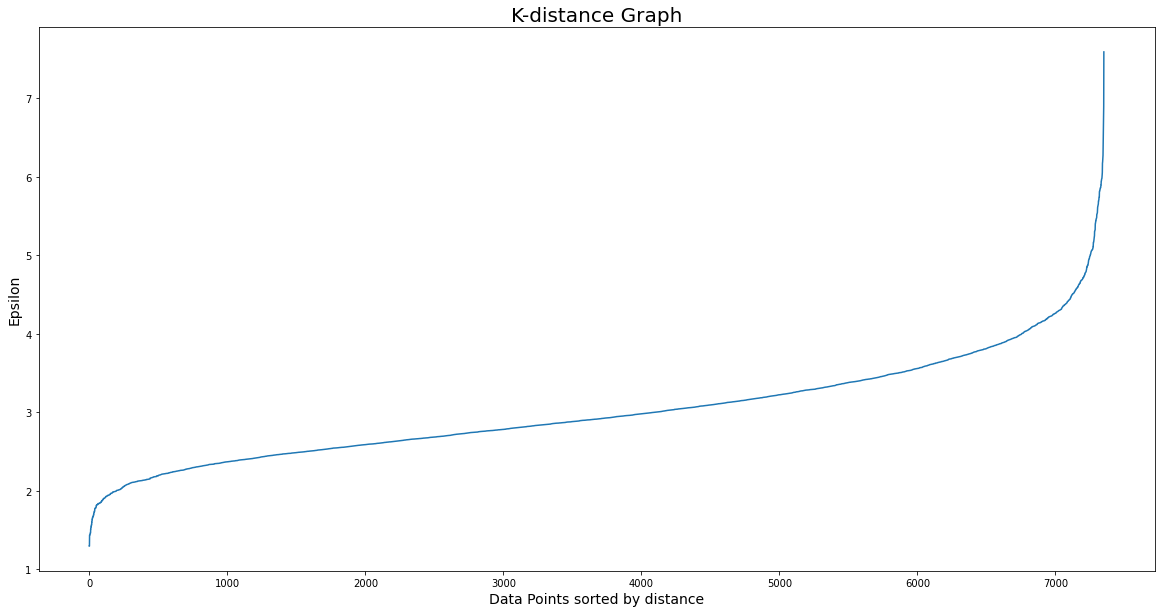

In [685]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [686]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=(2*D))
dbscan_labels = dbscan.fit_predict(x_train)

In [687]:
x_train['DBSCAN_labels']=dbscan.labels_
x_train['DBSCAN_labels'].value_counts()

-1    3893
 0    3459
Name: DBSCAN_labels, dtype: int64

In [688]:
# Silhouette score
silhouette_avg = silhouette_score(x_train, dbscan_labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.3962032044747058


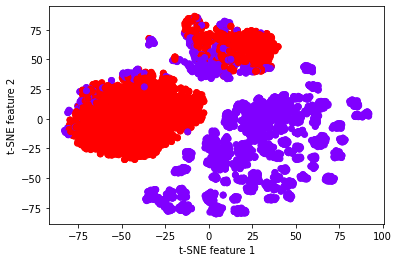

In [689]:
# Apply t-SNE to visualize the clusters in 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
x_train_tsne = tsne.fit_transform(x_train)

# Visualize the clusters
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

# Reduce dimensions

In [690]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-5.544544,-0.244836
1,-5.559821,-0.028193
2,-5.499817,0.346159
3,-5.701711,0.950107
4,-5.773200,1.218139


In [691]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(principalDf)
distances, indices = nbrs.kneighbors(principalDf)

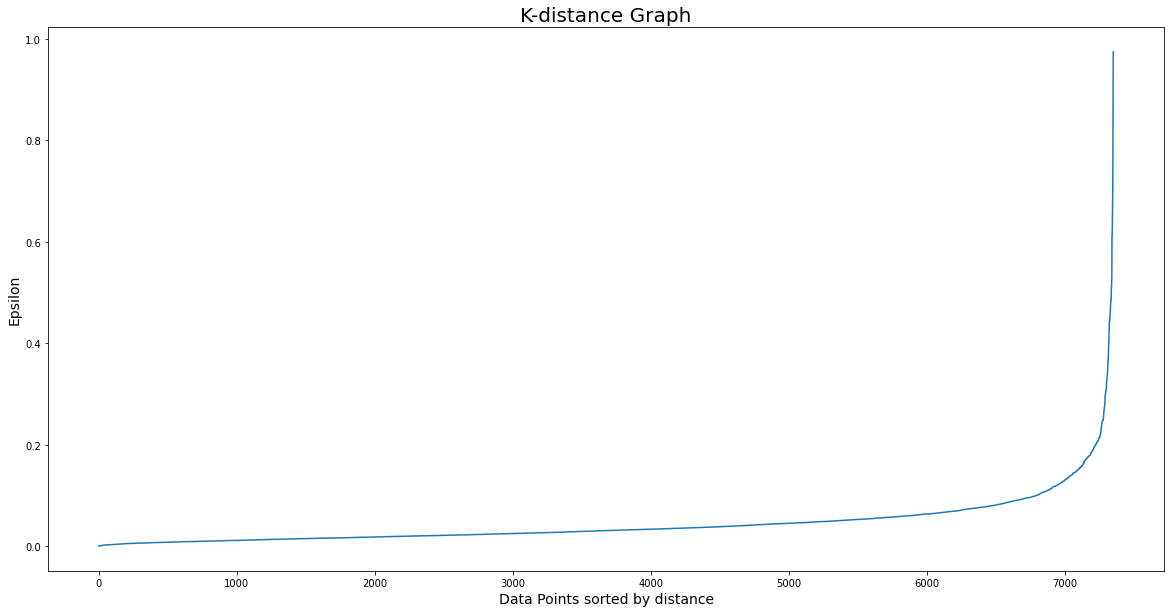

In [692]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [693]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=(4))
dbscan_labels = dbscan.fit_predict(principalDf)

In [694]:
principalDf['DBSCAN_labels']=dbscan.labels_
principalDf['DBSCAN_labels'].value_counts()

 0    4045
 1    3255
-1      39
 3       5
 2       4
 4       4
Name: DBSCAN_labels, dtype: int64

In [695]:
# Silhouette score
silhouette_avg = silhouette_score(principalDf, dbscan_labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.6940780356747392


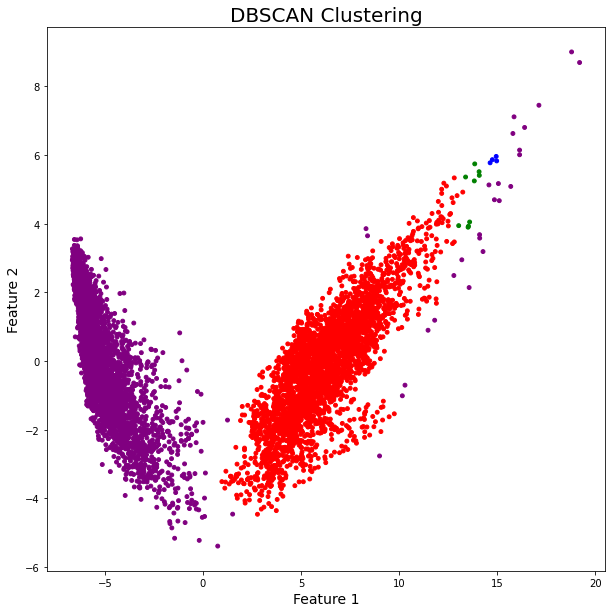

In [696]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1],c=principalDf['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()